In [139]:
# libraries

# essential libraries
import os
import math
import random
import datetime

# storing and analysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import pandas.plotting as pp

# statistics
from statsmodels.tsa.api import Holt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

## utils
# import utils_function as ut

## Define useful function plot
def get_plot(ax,title):
    ax=ax.plot()
    ax.set_title(title)
    ax.set_xlabel("Days")
    ax.set_ylabel("Confirmed Cases")
    ax.spines["top"].set_alpha(0)    
    return plt.tight_layout()


## function multi plot
def get_multiplot(df): 
    pp.register_matplotlib_converters()
    # Plot
    fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
    for i, ax in enumerate(axes.flatten()):
        data = df[df.columns[i]]
        ax.plot(data, linewidth=1) #color='blue'
        # Decorations
        ax.set_title(df.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
        ax.tick_params(labelsize=6)
    return plt.tight_layout()


def prepare_data(df):
    ## Put data in columns by country
    dfObj = pd.DataFrame(columns=['index','Region','Confirmed'])
    for i in df.Region.unique():
        df_2 = df[df['Region']==i]
        df_2.reset_index(inplace = True, drop = True)
        df_2.reset_index(inplace =True) 
        df_2 = df_2[['index','Region','Confirmed']]
        dfObj= dfObj.append(df_2)

    dfObj['Confirmed'] = pd.to_numeric(dfObj['Confirmed'])
    dfObj = dfObj.pivot(index='index',columns='Region',values='Confirmed')
    return dfObj




 # CRISP-DM 

## 1. Business Understanding

The Covid-19 is a contagious coronavirus that hailed from Wuhan, China. This new strain of virus has striked fear in many countries, as cities are quarantined and hospitals are overcrowded.

The rapid acceleration in new coronavirus cases making difficult the medical infrastructure to keep up. Is necessary understand how the cases will appear to know if the health sector could be attend all.

### 2. Data Understanding

In [19]:
## load data
df = pd.read_csv("data/covid_19.csv")

In [20]:
## Exploration
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [21]:
## dimension
df.shape

(19836, 8)

In [22]:
## Null data
df.isnull().sum()

Province/State    13756
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [23]:
## What happened with Province Variable?
df['Province/State'].unique() # Hubei 

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Nova Scotia', 'Ontario',
       'Prince Edward Island', 'Quebec', 'Saskatchewan', 'Anhui',
       'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi',
       'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong',
       'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin',
       'Liaoning', 'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong',
       'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang',
       'Yunnan', 'Zhejiang', 'Faroe Islands', 'Greenland',
       'French Guiana', 'French Polynesia', 'Guadeloupe', 'Mayotte',
       'New Caledonia', 'Reunion', 'Saint Barthelemy', 'St Martin',
       'Martinique', 'Aruba', 'Curacao', 'Sint

In [24]:
# Drop column with missing values. 'Province/State'
df = df.dropna(axis=1)


## I am going to work with Country/Region only
df = df.groupby(['Date','Country/Region'])['Confirmed'].sum().reset_index()
## rename the columns, 
df.columns = ['Date', 'Region','Confirmed']

In [25]:
## Put the correct format
df['Date']= pd.to_datetime(df['Date'])
df['Confirmed'] = pd.to_numeric(df['Confirmed'])
## ascending
df.sort_values(by=['Region','Date'], inplace=True, ascending=True)

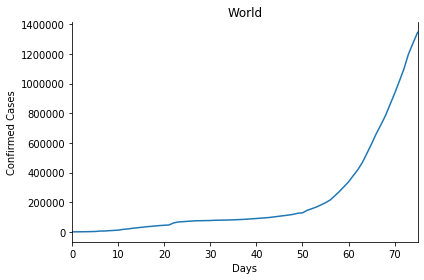

In [26]:
## how look world confirmed cases?
df_world = df.groupby(['Date'])['Confirmed'].sum().reset_index()

get_plot(df_world['Confirmed'],"World")


## 3. Prepare Data

In [30]:
## How look some countries confirmed cases at the same day of the pandemic?
## I am going to put the country data in columns to compare the same numeric days in the pandemic

# Drop rows with missing Confirmed values
df = df[df.Confirmed !=0]

### prepare Data
dfObj = prepare_data(df)



In [31]:
dfObj.head()

Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,2.0,...,4.0,2.0,4.0,1.0,2.0,2.0,4.0,4.0,2.0,1.0
1,1.0,10.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0,2.0,...,4.0,2.0,4.0,6.0,10.0,2.0,7.0,4.0,2.0,3.0
2,1.0,12.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0,3.0,...,4.0,2.0,8.0,10.0,17.0,2.0,16.0,NaN,2.0,3.0
3,1.0,23.0,1.0,1.0,3.0,1.0,2.0,1.0,6.0,3.0,...,4.0,2.0,29.0,15.0,33.0,2.0,16.0,NaN,2.0,3.0
4,1.0,33.0,1.0,1.0,3.0,1.0,8.0,1.0,9.0,9.0,...,5.0,2.0,50.0,23.0,36.0,2.0,19.0,NaN,3.0,3.0


In [32]:
## subset
## some countries to see
countries = ['China','Italy','US',
             'France','Spain','Brazil']

df_countries = dfObj[countries]

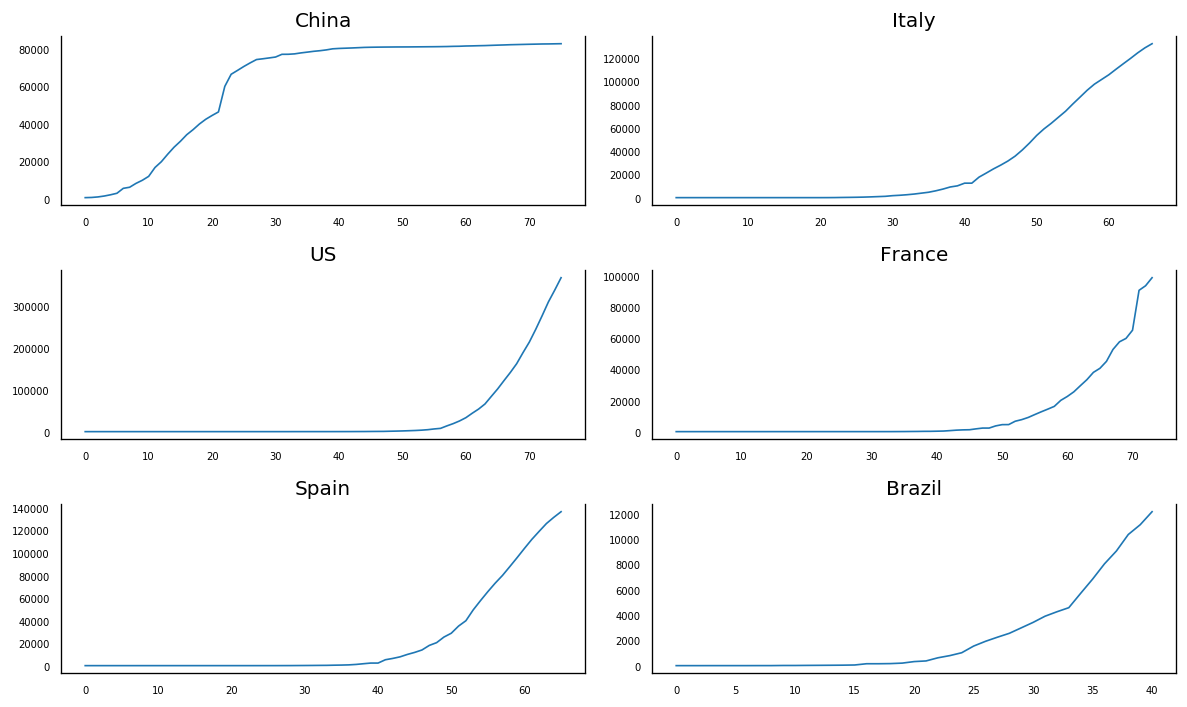

In [33]:
## plot
get_multiplot(df_countries)

#### How looks Mexico?

In [34]:
df[df["Region"]=="Mexico"].tail()

,Date,Region,Confirmed
13174,2020-04-02,Mexico,1378
13358,2020-04-03,Mexico,1510
13542,2020-04-04,Mexico,1688
13726,2020-04-05,Mexico,1890
13910,2020-04-06,Mexico,2143


In [35]:
## Subset Mexico, to know in what day of the pandemic is
df_mx = dfObj['Mexico']

# Drop rows with missing Confirmed values
df_mx = df_mx.dropna()
df_mx.index.max()


38

In [36]:
## # Drop rows without the same period of days like Mexico
df1 = dfObj[dfObj.index<=df_mx.index.max()]

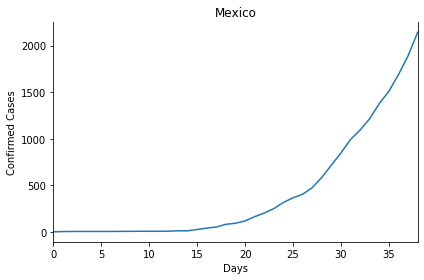

In [37]:
## Mexico plot visualization

## plot
get_plot(df_mx,'Mexico')

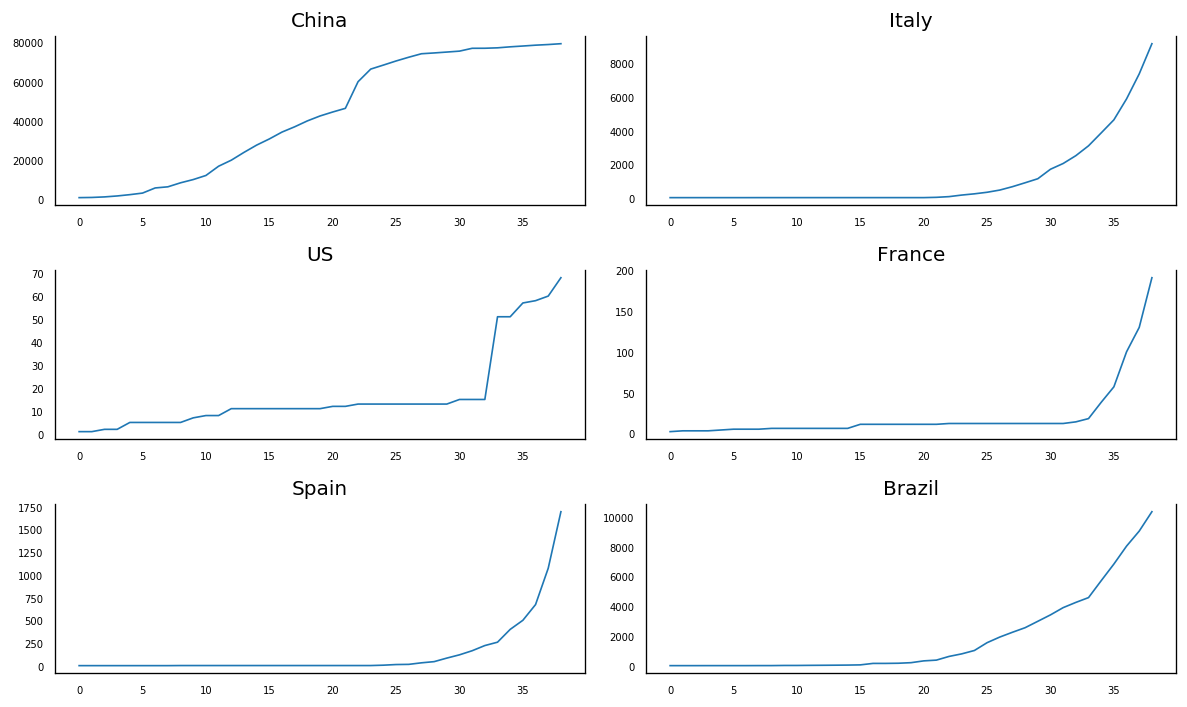

In [38]:
## subset
df_countries = df1[countries]

## plot
get_multiplot(df_countries)

Handling of missing values

In [35]:
## What countries are correlated with Mexico?

# Drop rows with missing Confirmed values
no_nulls= set(df1.columns[df1.isnull().sum()==0])
df1 = df1[no_nulls]

## Drop columns with not variation in values
yes_var = set(df1.columns[df1.var()!=0])
df1 = df1[yes_var]

## see correlation
df1_corr = df1.corr(method ='pearson') 

In [36]:
# Reset columns and index names 
df1_corr = df1_corr.rename_axis(None).rename_axis(None, axis=1)
df1_corr = df1_corr.stack().reset_index()

# Set column names
df1_corr.columns = ['Region1','Region2','Correlation']

In [37]:
df1_corr = df1_corr[df1_corr['Region1']=='Mexico']
df1_corr =df1_corr[df1_corr['Correlation']>0.85]

In [38]:
## sort
df1_corr.sort_values(by=['Correlation'], inplace=True, ascending=False)

In [39]:
df1_corr.head(6)

,Region1,Region2,Correlation
825,Mexico,Mexico,1.000000
842,Mexico,Romania,0.997952
848,Mexico,Oman,0.996541
851,Mexico,Croatia,0.995925
817,Mexico,New Zealand,0.995750
858,Mexico,North Macedonia,0.995419


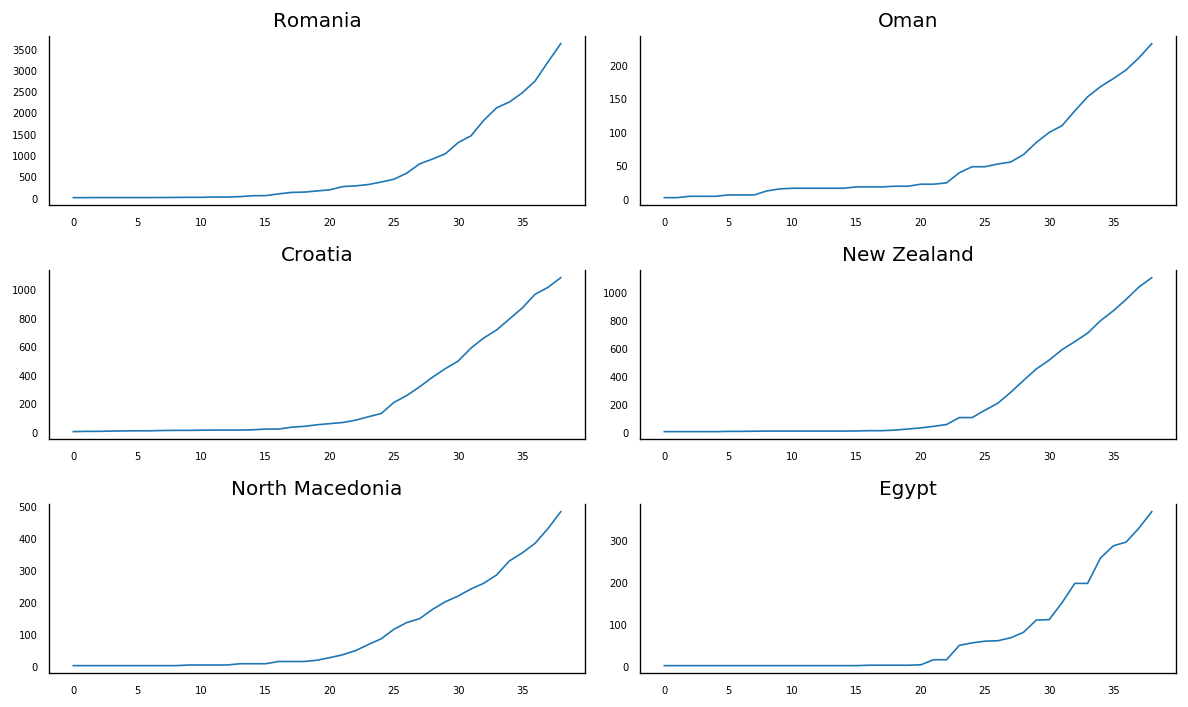

In [40]:
## subset
## some countries
countries = ['Romania','Oman','Croatia',
             'New Zealand','North Macedonia','Egypt']
df_countries = df1[countries]

## plot
get_multiplot(df_countries)

### Data Modeling

To understand thee situation of Mexico we used an exponential smoothing method. This model makes an assumption that the observations at previous days are useful to predict the value for the next day. This relationship is called correlation.


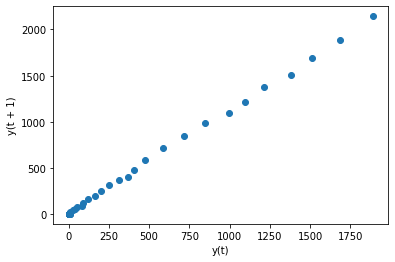

In [40]:

## relation plot 
pp.lag_plot(df_mx)



In [41]:
## Correlation periods 
values = pd.DataFrame(df_mx.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.999495
t+1  0.999495  1.000000


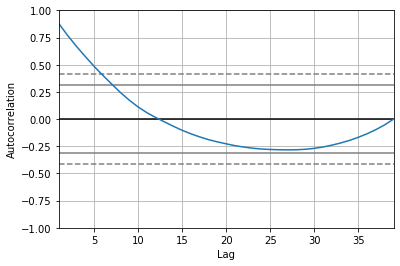

In [42]:
## autocorrelation plot
series = df_mx
pp.autocorrelation_plot(series)


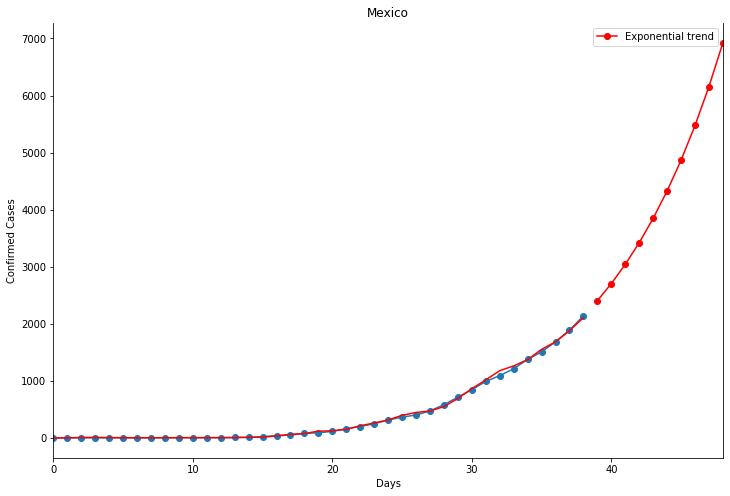

In [43]:
## model
data = pd.Series(df_mx)
data = data.astype('double')

fit = Holt(data, exponential=True).fit(
    smoothing_level=0.9, # alpha
    smoothing_slope=0.5,  # beta
    optimized=False)

fcast = fit.forecast(10).rename("Exponential trend")

ax = data.plot( marker="o", figsize=(12,8)) # color="blue",
fit.fittedvalues.plot(ax=ax, color='red')
fcast.plot(ax=ax, color='red', marker="o", legend=True)
ax.set_title("Mexico")
ax.set_xlabel("Days")
ax.set_ylabel("Confirmed Cases")
ax.spines["top"].set_alpha(0)
plt.show()
# print("Fg: Cases in Mexico Forecast.")

## Can we guess the Covid-19 cases in Mexico for next 10 days?

In [59]:
## foreecast
fit.forecast(10)

39    2406.331326
40    2706.269803
41    3043.594276
42    3422.964740
43    3849.622043
44    4329.460277
45    4869.108209
46    5476.020851
47    6158.582450
48    6926.222310
dtype: float64

## Evaluate the Results

In [134]:
# Holt Winter's Exponential Smoothing forecast

def exponential_smoothing_forecast(history, config):
    alpha,beta = config
    # define model model
    history = np.array(history)
    model = Holt(history, exponential=True)
    # fit model
    model_fit = model.fit(optimized=False, smoothing_level=alpha, smoothing_slope=beta)
    # make one step forecast
    yhat = model_fit.predict(len(history), len(history))
    return yhat[0]


# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]

# root mean squared error or rmse
def measure_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))


# we need to build up some functions for fitting and evaluating a model repeatedly via walk-forward validation

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = exponential_smoothing_forecast(history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    error = measure_rmse(test, predictions)
    return error


# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
    result = None
    # convert config to a key
    key = str(cfg)
    # show all warnings and fail on exception if debugging
    if debug:
        result = walk_forward_validation(data, n_test, cfg)
    else:
        # one failure during model validation suggests an unstable config
        try:
            # never show warnings when grid searching, too noisy
            with catch_warnings():
                filterwarnings("ignore")
                result = walk_forward_validation(data, n_test, cfg)
        except:
            error = None
    # check for an interesting result
    if result is not None:
        print(' > Model[%s] %.3f' % (key, result))
    return (key, result)


In [135]:
cfg = [[0.9,0.5],[0.8,0.5],[0.7,0.5],[0.6,0.5],[0.9,0.2],[0.8,0.2],[0.7,0.2],[0.6,0.2]]
n_test = 5

In [136]:
alpha,beta = [0.9,0.5]

In [137]:
scores = [score_model(data, n_test, cfg) for cfg in cfg_list]

In [138]:
scores = [r for r in scores if r[1] != None]

### Can we guess the Covid-19 cases in Mexico for next 10 days?

The numbers of cases in Mexico will increase exponentially in the near future, but with recent information of others countries we can see a flattening and descending effect. This information could be useful to modeling more days. It is necessary use information of countries similar to Mexico focus in data like population, urban population, population health and disease-control methods to make a cluster analysis.